In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex5.python.libs import *

In [3]:
mpl.rcParams['figure.dpi'] = 150

# Regularized Linear Regression and Bias v.s. Variance
## Introduction

In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties.

## 1. Regularized Linear Regression

In [4]:
data = sio.loadmat('../../data/ex5data1.mat')
X = data['X']
y = data['y'].ravel()
Xval = data['Xval']
yval = data['yval'].ravel()
Xtest = data['Xtest']
ytest = data['ytest'].ravel()
m = X.shape[0]

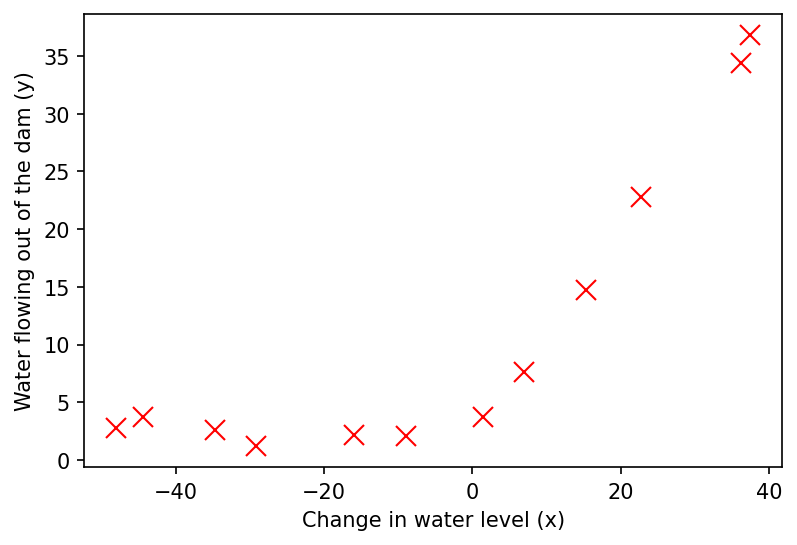

In [5]:
fig, ax = plt.subplots()
ax.plot(X, y, 'rx', markersize=10, linewidth=1.5)
ax.set(
    xlabel='Change in water level (x)',
    ylabel='Water flowing out of the dam (y)',
);

In [6]:
theta = np.array([1, 1])
lb = 1

J = linear_reg_cost_fn(theta, np.c_[np.ones((m, 1)), X], y, lb)
grad = linear_reg_grad_fn(theta, np.c_[np.ones((m, 1)), X], y, lb)

print(f'''Cost at theta = [1; 1]: {J}
(this value should be about 303.993192)

Gradient at theta = [1; 1]: {grad}
(this value should be about [-15.303016, 598.250744])
''')


Cost at theta = [1; 1]: 303.9931922202643
(this value should be about 303.993192)

Gradient at theta = [1; 1]: [-15.30301567 598.25074417]
(this value should be about [-15.303016, 598.250744])



## Train linear regression

In [7]:
lb = 0
theta = train_linear_reg(np.c_[np.ones((m, 1)), X], y, lb)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


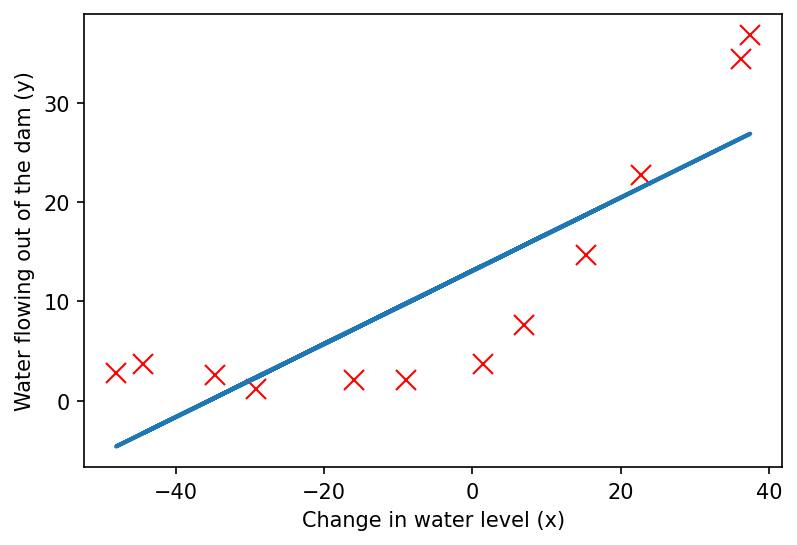

In [8]:
fig, ax = plt.subplots()
ax.plot(X, y, 'rx', markersize=10, linewidth=1.5)
ax.set(
    xlabel='Change in water level (x)',
    ylabel='Water flowing out of the dam (y)',
);
ax.plot(X, theta @ np.c_[np.ones((m, 1)), X].T, '-', linewidth=2)

## Bias-variance
### Learning curves

we shuld see underfitting

In [9]:
lb = 0
error_train, error_val = learning_curve(
    np.c_[np.ones((m, 1)), X], y,
    np.c_[np.ones((Xval.shape[0], 1)), Xval], yval,
    lb
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

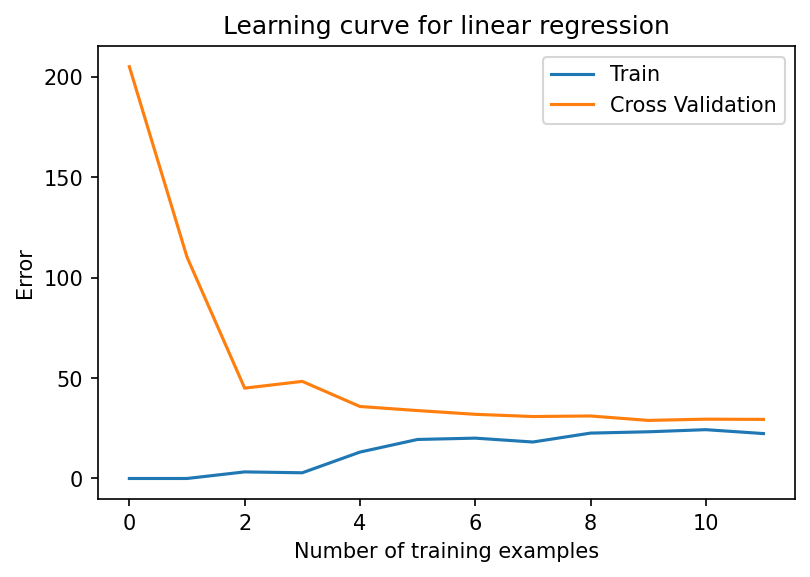

In [10]:
fig, ax = plt.subplots()
ax.plot(range(m), error_train, range(m), error_val)
ax.set(
    xlabel='Number of training examples',
    ylabel='Error',
    title='Learning curve for linear regression'
)
ax.legend(['Train', 'Cross Validation'])

## Feature mapping for polynomial regression

In [11]:
p = 8

# map X -> polynomial features and normalize
X_poly = poly_features(X, p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.c_[np.ones((m, 1)), X_poly]

# map X_poly_test -> polynomial features and normalize (using mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma
X_poly_test = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]

# map X_poly_val -> polynomial features and normalize (using mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma
X_poly_val = np.c_[np.ones((X_poly_val.shape[0], 1)), X_poly_val]

In [12]:
print(f'''Normalized Training Example 1:
{X_poly[1, :]}
''')

Normalized Training Example 1:
[ 1.         -0.8389201   0.0013142  -0.25896174 -0.34156482  0.09754927
 -0.45519664  0.26677343 -0.46887381]



### Learning curve for polynomial regression

In [13]:
lb = 0
theta = train_linear_reg(X_poly, y, lb)

         Current function value: 0.028898
         Iterations: 200
         Function evaluations: 435
         Gradient evaluations: 435


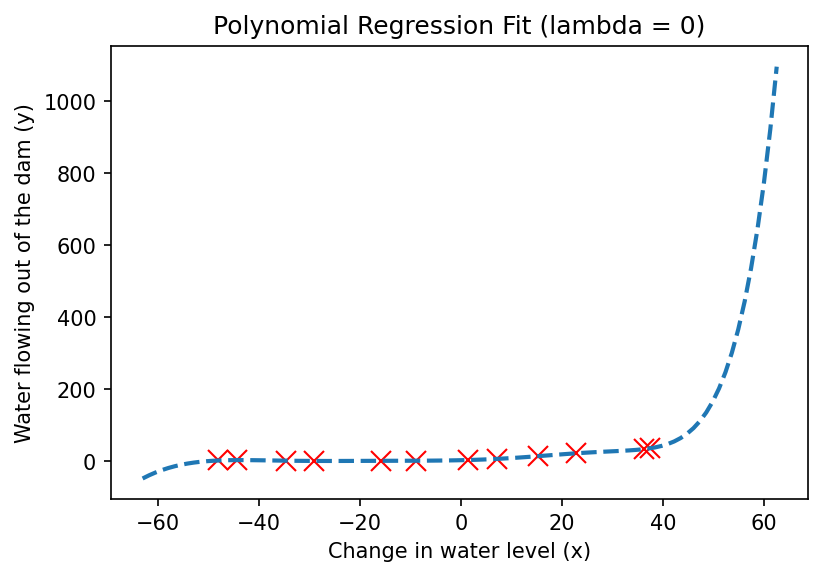

In [14]:
fig, ax = plt.subplots()
ax.plot(X, y, 'rx', markersize=10, linewidth=1.5)
ax = poly_fit(ax, X.min(), X.max(), mu, sigma, theta, p)
ax.set(
    xlabel='Change in water level (x)',
    ylabel='Water flowing out of the dam (y)',
    title=f'Polynomial Regression Fit (lambda = {lb})'
);

In [15]:
error_train, error_val = learning_curve(
    X_poly, y,
    X_poly_val, yval,
    lb
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 182
         Function evaluations: 326
       

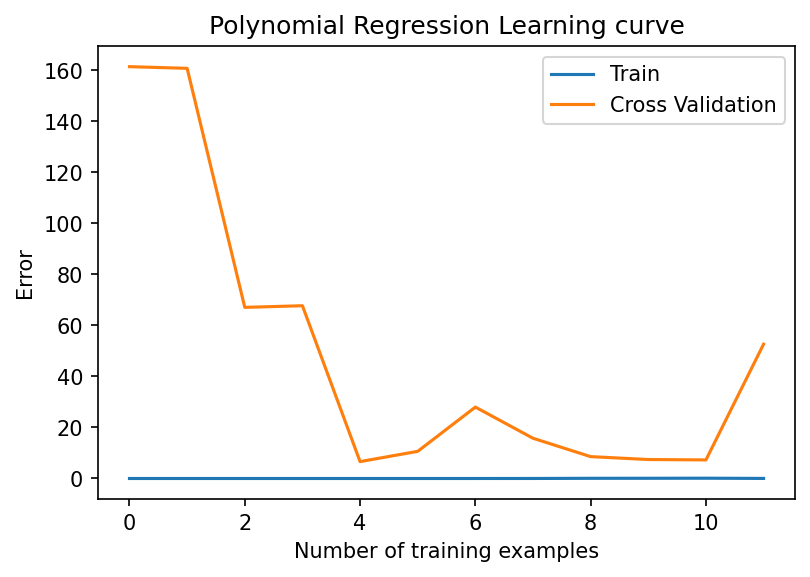

In [16]:
fig, ax = plt.subplots()
ax.plot(range(m), error_train, range(m), error_val)
ax.set(
    xlabel='Number of training examples',
    ylabel='Error',
    title='Polynomial Regression Learning curve'
)
ax.legend(['Train', 'Cross Validation'])

In [17]:
print(f'''Polynomial Regression (lambda = {lb})
# Training Example\tTraining Error\tCross Validation Error
''')
for i in range(m):
    print(f'  \t{i}\t\t{error_train[i]:f}\t{error_val[i]:f}\n')

Polynomial Regression (lambda = 0)
# Training Example	Training Error	Cross Validation Error

  	0		0.000000	161.442168

  	1		0.000000	160.792292

  	2		0.000000	67.084922

  	3		0.000000	67.726849

  	4		0.000000	6.616987

  	5		0.000000	10.645860

  	6		0.000000	27.990083

  	7		0.007921	15.775253

  	8		0.073821	8.570338

  	9		0.084524	7.436467

  	10		0.114248	7.279467

  	11		0.028898	52.660761



## Validation for selecting lambda

the best value for $\lambda$ is around 3.

In [18]:
lb_vec, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

         Current function value: 0.028898
         Iterations: 200
         Function evaluations: 435
         Gradient evaluations: 435
0, (9,), (9, 21), (21,)
         Current function value: 0.170868
         Iterations: 200
         Function evaluations: 387
         Gradient evaluations: 387
0.001, (9,), (9, 21), (21,)
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 199
         Function evaluations: 383
         Gradient evaluations: 383
0.003, (9,), (9, 21), (21,)
         Current function value: 0.371283
         Iterations: 200
         Function evaluations: 376
         Gradient evaluations: 376
0.01, (9,), (9, 21), (21,)
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 106
         Function evaluations: 195
         Gradient evaluations: 195
0.03, (9,), (9, 21), (21,)
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 70
 

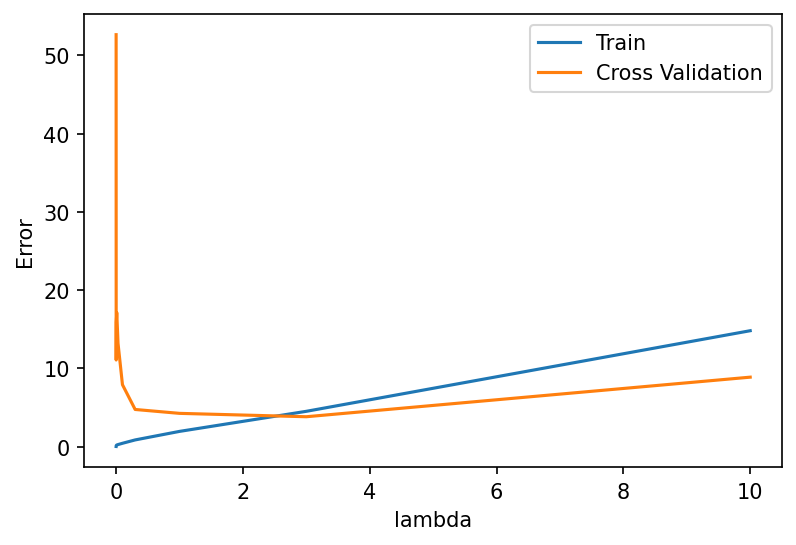

In [19]:
fig, ax = plt.subplots()
ax.plot(lb_vec, error_train, lb_vec, error_val)
ax.set(
    xlabel='lambda',
    ylabel='Error'
)
ax.legend(['Train', 'Cross Validation']);

In [20]:
print(f'''
\t# lambda\tTraining Error\tCross Validation Error
''')
for i, lb in enumerate(lb_vec):
    print(f'  \t{lb}\t\t{error_train[i]:f}\t{error_val[i]:f}\n')


	# lambda	Training Error	Cross Validation Error

  	0		0.028898	52.660761

  	0.001		0.119721	11.084812

  	0.003		0.166713	15.915628

  	0.01		0.218007	17.150793

  	0.03		0.275162	13.213901

  	0.1		0.438654	7.927073

  	0.3		0.868167	4.760816

  	1		1.958695	4.263359

  	3		4.525105	3.832176

  	10		14.825808	8.889725



## Computing test set error

In [21]:
lb = 3
theta = train_linear_reg(X_poly, y, lb)
error_test = linear_reg_cost_fn(theta, X_poly_test, ytest, 0)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24


In [22]:
print(f'erro_test for lambda = {lb}: {error_test}')

erro_test for lambda = 3: 3.572026619264657


In [35]:
lb = 0.01
error_train, error_val = rnd_learning_curve(X_poly, y, X_poly_val, yval, lb)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 10
         G

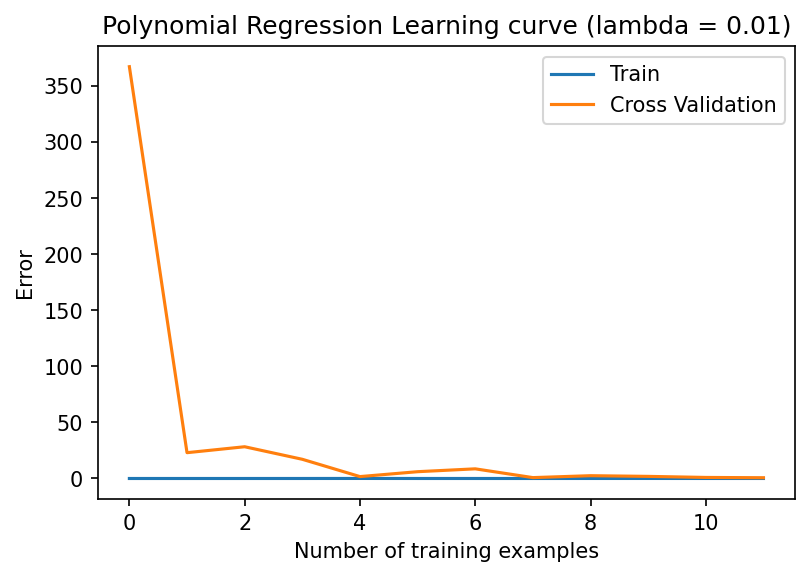

In [38]:
fig, ax = plt.subplots()
ax.plot(range(m), error_train, range(m), error_val)
ax.set(
    xlabel='Number of training examples',
    ylabel='Error',
    title=f'Polynomial Regression Learning curve (lambda = {lb})'
)
ax.legend(['Train', 'Cross Validation']);